# Deepfake Detection Project: 67-426 
## Team Quarks: Ali & Belal
Fall 2023

---

## Introduction

In this file, we will be performing feature extraction. We aim to further explore some of the behavior of the data and transform them into a format that is more suitable for training a model.

---

## Initialization and Data Loading

```python
### Import necessary libraries

In this stage of the project, we know performance and neatness are two major factors that will either make or break our project. After performing our initial EDA, we created an extensive multi-class wrapper that will allow us to perform all of our data loading, preprocessing, feature extraction, and even visualization. We currently split our wrapper into three classes, Video(), Frame(), and Metadata(). You will see them in action below.

In [1]:
from classes import *
import constants as c
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Constants
SAMPLE_METADATA = c.SAMPLE_DATA_DIR + '/metadata.json'
NUM_FRAMES = 100

In [2]:
metadata = Metadata(SAMPLE_METADATA, sample=True)

original_df = metadata.original()
fake_df = metadata.fake()

In [3]:
original_df.head()

,id
2,abarnvbtwb
13,aelfnikyqj
17,afoovlsmtx
20,agrmhtjdlk
24,ahqqqilsxt


In [4]:
fake_df.head()

,id,original
0,aagfhgtpmv,vudstovrck
1,aapnvogymq,jdubbvfswz
3,abofeumbvv,atvmxvwyns
4,abqwwspghj,qzimuostzz
5,acifjvzvpm,kbvibjhfzo


### Loading the data

In [5]:
# Here we get a set of pairs of video samples. Each pair is a tuple of (original, fake)
pairs_df = metadata.get_sample_pairs().drop_duplicates(subset=['id_original'])

# Weed out poor quality pairs
pairs_df.drop(3, inplace=True)
pairs_df.drop(10, inplace=True)

In [6]:
# Create a list of Video objects, these process and create all the dataframes and features
original_video = Video(metadata, 'afoovlsmtx', frameLimit=NUM_FRAMES)
fake_video = Video(metadata, 'etmcruaihe', frameLimit=NUM_FRAMES)

Loading frames for video afoovlsmtx...


  0%|          | 0/100 [00:00<?, ?it/s]

## Explore the data

Here we can visualize the face landmarks for a specific video. We have the original (real) video, and the fake video, as well as the comparison. We see some slight differences, which is a good indicator and an opportunity to investigate further.

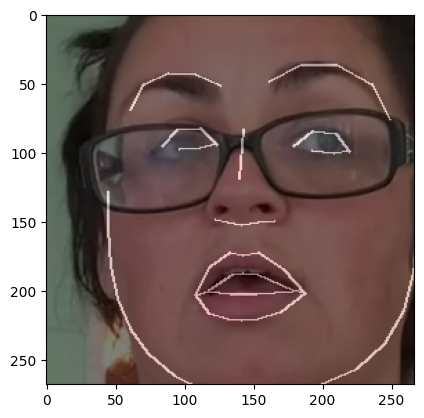

In [7]:
original_video.drawFaceLandmarks(1)

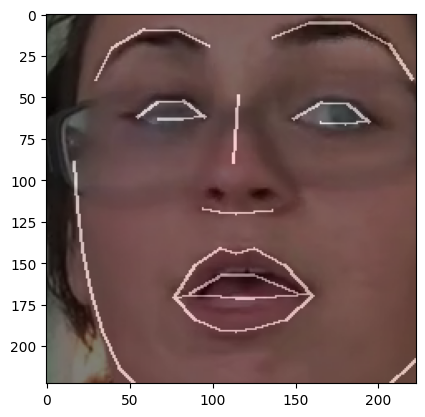

In [8]:
fake_video.drawFaceLandmarks(1)

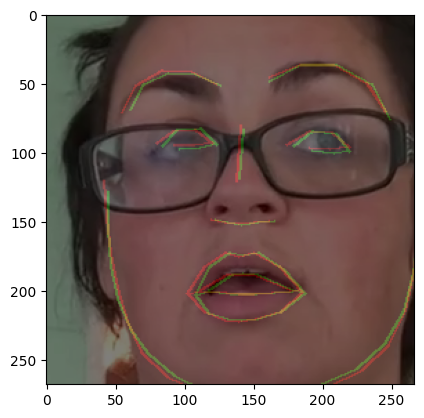

In [9]:
original_video.drawFaceLandmarkComparison(1, fake_video)

Let's take a look at the distances between the landmarks for our videos. We have countless landmarks, such as the corners of the eyes, the nose, the mouth, etc. We can calculate the distance each landmark travels between frames to get a better idea of the movement of the face. Since the nose tip is the center of the face, we can use that as a reference point.

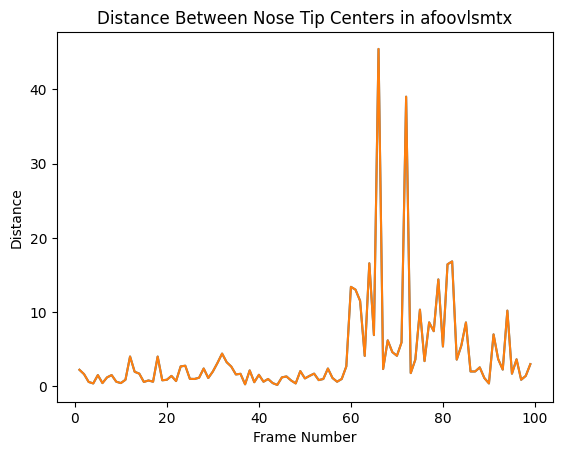

In [10]:
original_video.graphFeatureDistance("nose_tip")

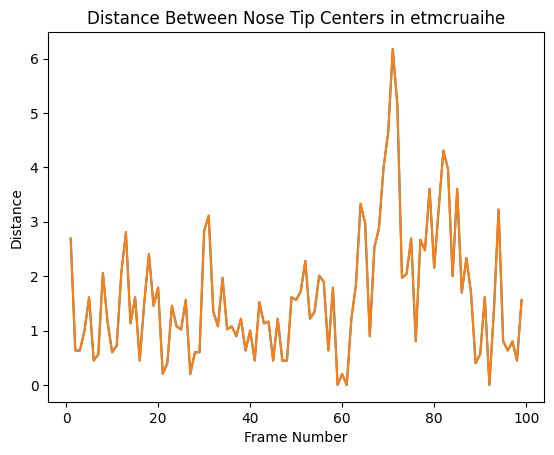

In [11]:
fake_video.graphFeatureDistance("nose_tip")

There are clearly some differences between the real and fake videos. We can also compare the distances in a single plot for both videos.

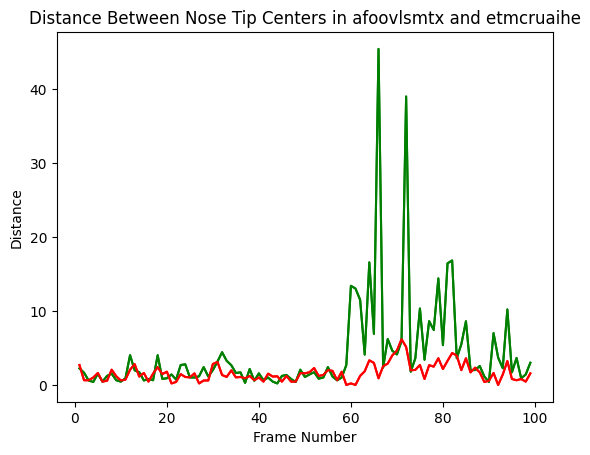

In [12]:
original_video.graphFeatureDistanceComparison("nose_tip", fake_video)

This is an interesting plot. We can see that the original video has a lot more movement than the real video. Upon further investigation, we found that the original video is a video of a person with glasses, and the fake video is a video of the same person without glasses, which reasonably effects how our facial detection sees the face. Although the result for this video is unique, this is a good indicator that we are on the right track with understanding the data.

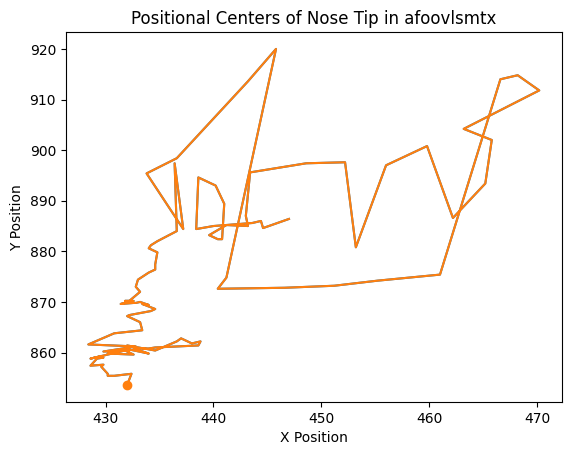

In [13]:
original_video.drawFeatureCentralPositions("nose_tip")

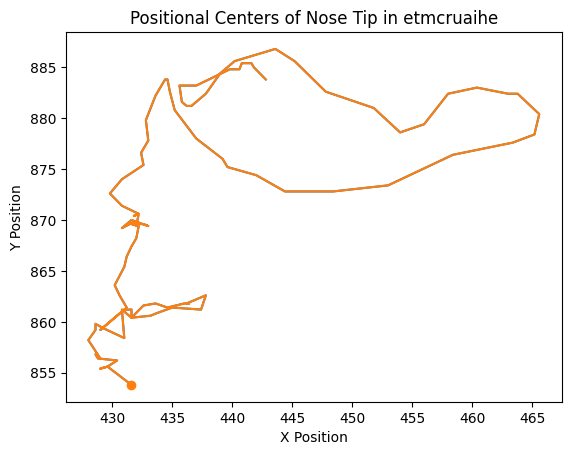

In [14]:
fake_video.drawFeatureCentralPositions("nose_tip")

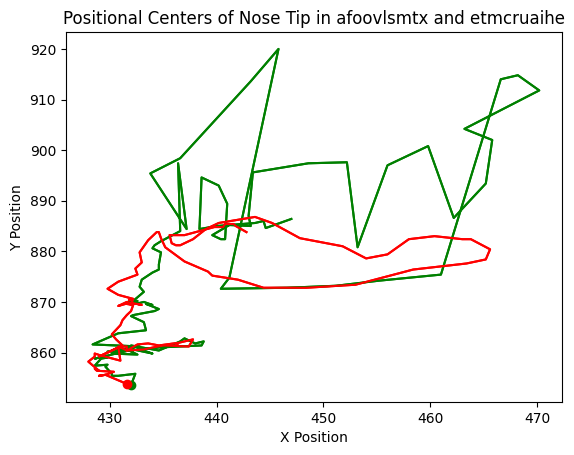

In [15]:
original_video.drawFeatureCentralPositionsComparison("nose_tip", fake_video)

Let's take a look at the velocity of the landmarks. We can calculate the velocity by taking the distance between the landmarks and dividing it by the time between frames. This will give us a better idea of the movement of the face not just on a positional level, but also on a time level where direction and speed are taken into account.

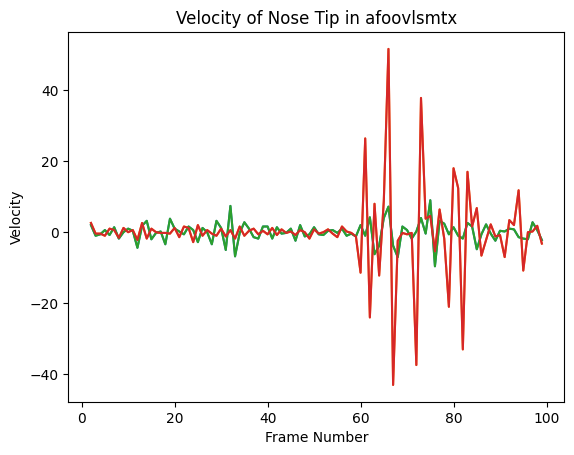

In [16]:
original_video.graphFeatureVelocity("nose_tip")

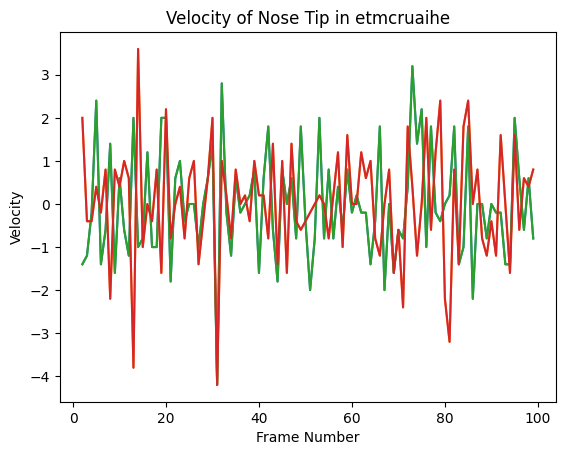

In [17]:
fake_video.graphFeatureVelocity("nose_tip")

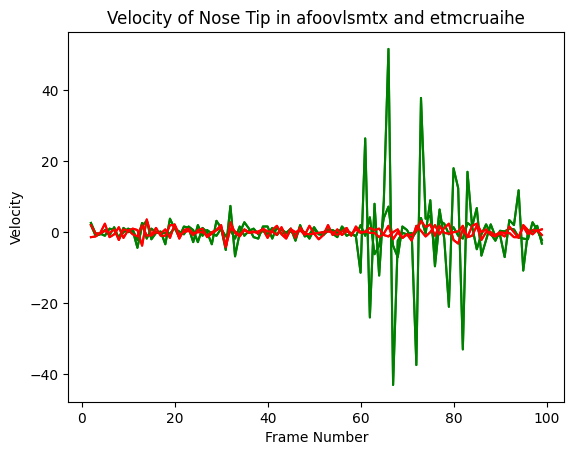

In [18]:
original_video.graphFeatureVelocityComparison("nose_tip", fake_video)

This data seems to be synonymous with our earlier findings. The original video has a lot more movement than the fake video. Before doing so, we can see the information collected so far in a table format. Notice that since distance and velocity rely on previous frame(s), the first and second frame will be missing from the table.

In [19]:
original_video.getFeatureDf("nose_tip")

,0,1,2,3,4,central_position,distance,velocity_x,velocity_y
0,"(411, 851)","(420, 854)","(430, 856)","(443, 854)","(456, 853)","[432.0, 853.6]",NaN,NaN,NaN
1,"(412, 854)","(421, 856)","(431, 858)","(443, 856)","(455, 855)","[432.4, 855.8]",2.236068,NaN,NaN
2,"(410, 853)","(420, 856)","(430, 857)","(441, 856)","(453, 855)","[430.8, 855.4]",1.649242,2.0,2.6
3,"(410, 853)","(419, 856)","(429, 857)","(441, 856)","(452, 855)","[430.2, 855.4]",0.600000,-1.0,-0.4
4,"(409, 854)","(419, 857)","(429, 857)","(441, 856)","(453, 855)","[430.2, 855.8]",0.400000,-0.6,-0.4
...,...,...,...,...,...,...,...,...,...
95,"(420, 883)","(430, 886)","(440, 887)","(450, 886)","(460, 883)","[440.0, 885.0]",1.708801,-1.8,-10.8
96,"(424, 885)","(434, 886)","(444, 886)","(453, 886)","(463, 885)","[443.6, 885.6]",3.649658,-2.0,0.0
97,"(426, 886)","(435, 887)","(445, 886)","(453, 886)","(463, 885)","[444.4, 886.0]",0.894427,2.8,0.2
98,"(424, 883)","(434, 885)","(445, 887)","(455, 885)","(465, 883)","[444.6, 884.6]",1.414214,0.6,1.8


Let's check out a different example.

In [20]:
original_video_2 = Video(metadata, 'bdnaqemxmr', frameLimit=NUM_FRAMES)
fake_video_2 = Video(metadata, 'etohcvnzbj', frameLimit=NUM_FRAMES)

Loading frames for video bdnaqemxmr...


  0%|          | 0/100 [00:00<?, ?it/s]

Loading frames for video etohcvnzbj...


  0%|          | 0/100 [00:00<?, ?it/s]

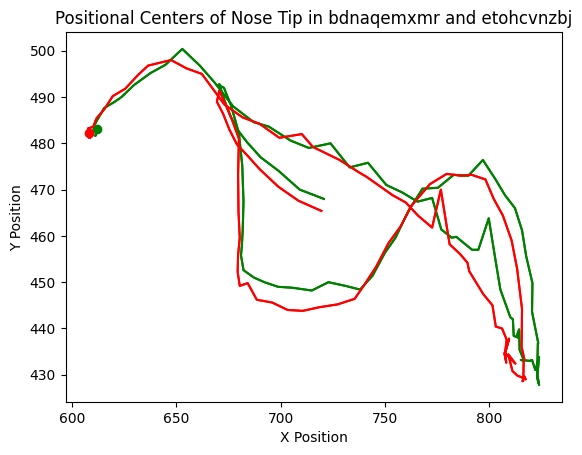

In [21]:
original_video_2.drawFeatureCentralPositionsComparison("nose_tip", fake_video_2)

Here we can see more uniform movement, great! Let's take a look at the velocities, this time, we will split the velocities into x and y components. Faces tend to move side to side more than up and down, so this will give us a better idea of the movement.

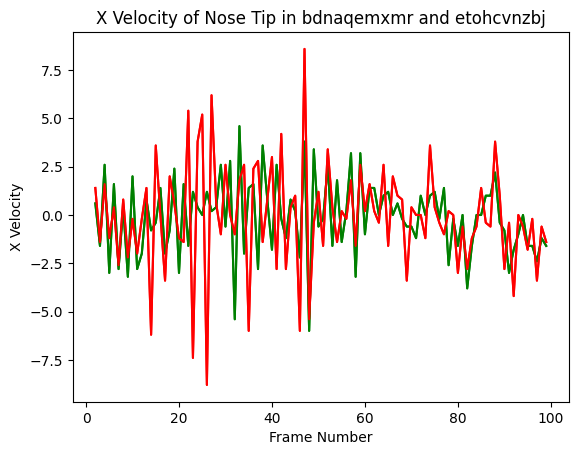

In [22]:
original_video_2.graphFeatureVelocityXComparison("nose_tip", fake_video_2)

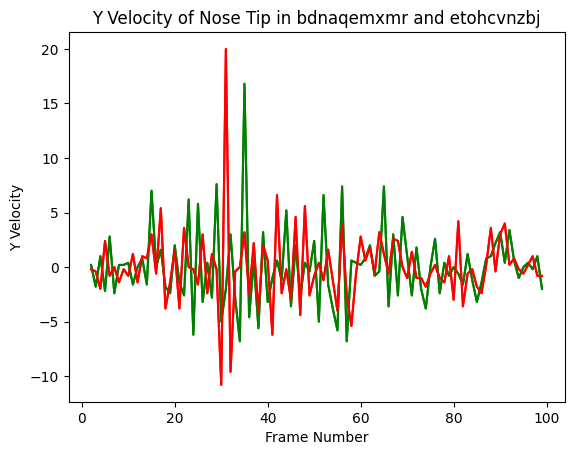

In [23]:
original_video_2.graphFeatureVelocityYComparison("nose_tip", fake_video_2)

Very interesting. We can see that the original video has a lot more movement in the x direction than the fake video. This is a good indicator and a reasonable finding that we can use to train our model.

The main goal is to extract a feature or features that will allow us to differentiate between each video, not just between frames. To represent our findings, we can take the variance of the velocities. This will give us a single value that represents the variance of the velocities for each video.

In [24]:
original_video_2.getVelocityVariance("nose_tip")

(3.902644731361942, 12.473673469387759)

In [25]:
fake_video_2.getVelocityVariance("nose_tip")

(7.622207413577537, 11.879733444398175)

In [27]:
original_video_2._export_features("./data/landmarks/")

AttributeError: 'list' object has no attribute 'tolist'

Awesome! We can see that the fake video has a much higher variance than the fake video.

Now we can extract the features for all of our videos. We will be extracting the variance of the velocities for each video. In this current state, while we are still finding ways to speed up processing times, we will be extracting the features for 10 videos. 5 real videos and 5 fake videos that are part of the same pairs. Ultimately, we hope to use as much of our dataset as possible to extract features.

In [26]:
df1 = pairs_df.rename(columns={'id_original': 'id'})[['id']].head(5)
df2 = pairs_df.rename(columns={'id_fake': 'id'})[['id']].head(5)
features_1 = []
features_2 = []

for index, row in df1.iterrows():
    video = Video(metadata, row['id'], frameLimit=NUM_FRAMES, tq="tqdm")
    variance = video.getVelocityVariance("nose_tip")
    label = 'real'
    features_1.append([row['id'], 'nose_tip', variance, label])
    
for index, row in df2.iterrows():
    video = Video(metadata, row['id'], frameLimit=NUM_FRAMES, tq="tqdm")
    variance = video.getVelocityVariance("nose_tip")
    label = 'fake'
    features_2.append([row['id'], 'nose_tip', variance, label])

features_df = pd.DataFrame(features_1 + features_2, columns=['id', 'feature', 'variance', 'label'])
    

Loading frames for video abarnvbtwb...


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [01:41<00:00,  1.02s/it]


Loading frames for video afoovlsmtx...


 23%|██▎       | 23/100 [00:24<01:20,  1.05s/it]


KeyboardInterrupt: 

Final Output

In [ ]:
features_df.head(10)

,id,feature,variance,label
0,abarnvbtwb,nose_tip,29.019159,real
1,afoovlsmtx,nose_tip,129.953853,real
2,atkdltyyen,nose_tip,1.026776,real
3,avmjormvsx,nose_tip,2.231170,real
4,bdnaqemxmr,nose_tip,16.376318,real
5,eepezmygaq,nose_tip,26.290654,fake
6,etmcruaihe,nose_tip,3.303432,fake
7,cksanfsjhc,nose_tip,2.007118,fake
8,ehfiekigla,nose_tip,63.390108,fake
9,etohcvnzbj,nose_tip,19.501941,fake
